In [31]:
%config IPCompleter.greedy=True

#Se importa la libreria para acceder a Google Drive
#from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

#Se establece la conexión con Google Drive
#drive.mount('/content/drive')


In [8]:
#Ruta de acceso a Datos
#mainspath= '/content/drive/My Drive/Python/Datasets'

#filename= 'Advertising.csv'

#fullpath= os.path.join(mainspath, filename)

#Path desde GitHub
fullpath= "https://raw.githubusercontent.com/GiulianoP/Datasets/main/ads/Advertising.csv?token=GHSAT0AAAAAABVZ6CXAWJEDJYIYMJUDMF5OYVU5WIA"


In [10]:
data_ads= pd.read_csv(fullpath)

data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
len(data_ads)

200

In [12]:
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"])) #Numerador de la correlación de Pearson

In [13]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [14]:
data_ads["corr1"]= (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [15]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [16]:
data_ads["corr2"]= (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [17]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [18]:
corr_pearson= sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))

In [19]:
corr_pearson

0.782224424861606

In [20]:
def corr_coef (df, var1, var2):
  df["corrn"] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
  df["corr1"]= (df[var1] - np.mean(df[var1]))**2
  df["corr2"]= (df[var2] - np.mean(df[var2]))**2
  corr_pearson= sum(df["corrn"])/np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
  return corr_pearson

* Una correlación menor a 0.6 es mera casualidad, no se debe tener en cuenta.
* Que haya correlación no explica que haya causalidad debido a un único factor. Puede que se deba a varios factores.

In [21]:
corr_coef(data_ads, "TV", "Sales")

0.782224424861606

In [22]:
corr_coef(data_ads, "Radio", "Sales")

0.5762225745710553

In [23]:
corr_coef(data_ads, "Newspaper", "Sales")

0.22829902637616525

In [24]:
#Se vuele a hacer la carga primeramente
cols= data_ads.columns.values
print(cols)

['TV' 'Radio' 'Newspaper' 'Sales' 'corrn' 'corr1' 'corr2']


In [25]:
for x in cols:
  for y in cols:
    print('correlación de ' + x + ' y ' + y + ' es: ' + str(corr_coef(data_ads, x, y)))

correlación de TV y TV es: 1.0
correlación de TV y Radio es: 0.05480866446583009
correlación de TV y Newspaper es: 0.056647874965056993
correlación de TV y Sales es: 0.782224424861606
correlación de TV y corrn es: -0.0011216033233262073
correlación de TV y corr1 es: -0.07879735036509569
correlación de TV y corr2 es: -0.04435683271077501
correlación de Radio y TV es: 0.05480866446583009
correlación de Radio y Radio es: 1.0
correlación de Radio y Newspaper es: 0.3541037507611752
correlación de Radio y Sales es: 0.5762225745710553
correlación de Radio y corrn es: 0.003367194224496663
correlación de Radio y corr1 es: 0.1085768694522202
correlación de Radio y corr2 es: 0.28933391270094067
correlación de Newspaper y TV es: 0.056647874965056993
correlación de Newspaper y Radio es: 0.3541037507611752
correlación de Newspaper y Newspaper es: 1.0
correlación de Newspaper y Sales es: 0.22829902637616525
correlación de Newspaper y corrn es: 0.004654495262249754
correlación de Newspaper y corr1 es:

Text(0.5, 1.0, 'Gasto en TV vs Ventas del Producto')

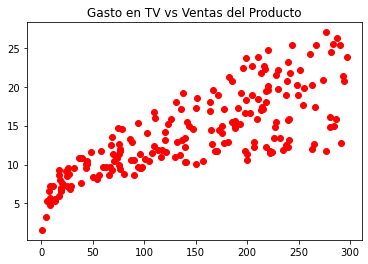

In [26]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en TV vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del Producto')

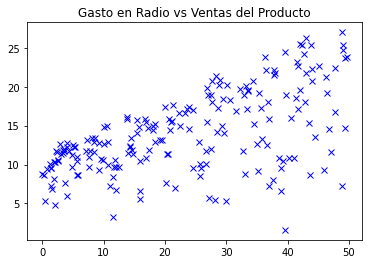

In [27]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "bx")
plt.title("Gasto en Radio vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Newspaper vs Ventas del Producto')

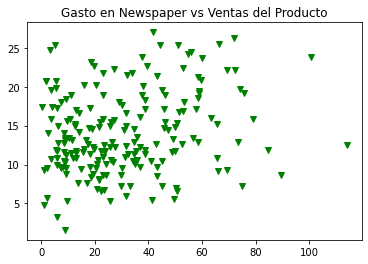

In [28]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "gv")
plt.title("Gasto en Newspaper vs Ventas del Producto")

In [29]:
corr_ads= data_ads[["TV", "Radio", "Newspaper", "Sales"]].corr()
corr_ads

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


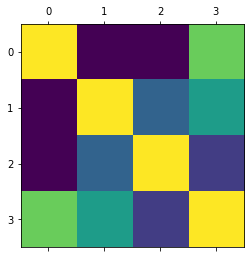

In [30]:
plt.matshow(corr_ads)

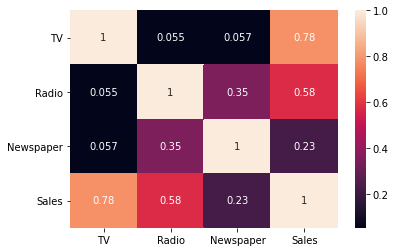

In [32]:
sns.heatmap(corr_ads, annot=True)
plt.show()